# EDA

In [4]:
from google.colab import files
uploaded = files.upload()

Saving cinemaTicket_Ref.csv to cinemaTicket_Ref (1).csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# نقرأ الملف
df = pd.read_csv("cinemaTicket_Ref.csv", sep=';')

# نخلي التاريخ بصيغة تاريخ
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# نضيف اسم اليوم وعمود ويكند بولين
df["day_name"] = df["date"].dt.day_name()
df["is_weekend"] = df["day_name"].isin(["Friday", "Saturday"])

# ----------------- 1) نظرة عامة -----------------
print("Shape:", df.shape)         # حجم البيانات
print(df.info())                  # أنواع الأعمدة
print(df.describe())              # وصف الأعمدة الرقمية

Shape: (142524, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   film_code     142524 non-null  int64         
 1   cinema_code   142524 non-null  int64         
 2   total_sales   142524 non-null  int64         
 3   tickets_sold  142524 non-null  int64         
 4   tickets_out   142524 non-null  int64         
 5   show_time     142524 non-null  int64         
 6   occu_perc     142399 non-null  float64       
 7   ticket_price  142524 non-null  float64       
 8   ticket_use    142524 non-null  int64         
 9   capacity      142399 non-null  float64       
 10  date          53794 non-null   datetime64[ns]
 11  Day Name      142524 non-null  object        
 12  month         142524 non-null  int64         
 13  quarter       142524 non-null  int64         
 14  day           142524 non-null  int64         
 1

/tmp/ipython-input-216622558.py:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cinemaTicket_Ref.csv", sep=';')


In [6]:
print(df.columns)


Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'Day Name', 'month', 'quarter', 'day', 'is_weekend',
       'day_name'],
      dtype='object')


In [7]:
print(df.info())                  # أنواع الأعمدة


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   film_code     142524 non-null  int64         
 1   cinema_code   142524 non-null  int64         
 2   total_sales   142524 non-null  int64         
 3   tickets_sold  142524 non-null  int64         
 4   tickets_out   142524 non-null  int64         
 5   show_time     142524 non-null  int64         
 6   occu_perc     142399 non-null  float64       
 7   ticket_price  142524 non-null  float64       
 8   ticket_use    142524 non-null  int64         
 9   capacity      142399 non-null  float64       
 10  date          53794 non-null   datetime64[ns]
 11  Day Name      142524 non-null  object        
 12  month         142524 non-null  int64         
 13  quarter       142524 non-null  int64         
 14  day           142524 non-null  int64         
 15  is_weekend    142

In [8]:
# نشوف عدد القيم المفقودة في كل عمود
print(df.isnull().sum())
print("----------------------------------------")
# أو مع النسب المئوية
print(df.isnull().mean() * 100)


film_code           0
cinema_code         0
total_sales         0
tickets_sold        0
tickets_out         0
show_time           0
occu_perc         125
ticket_price        0
ticket_use          0
capacity          125
date            88730
Day Name            0
month               0
quarter             0
day                 0
is_weekend          0
day_name        88730
dtype: int64
----------------------------------------
film_code        0.000000
cinema_code      0.000000
total_sales      0.000000
tickets_sold     0.000000
tickets_out      0.000000
show_time        0.000000
occu_perc        0.087705
ticket_price     0.000000
ticket_use       0.000000
capacity         0.087705
date            62.256181
Day Name         0.000000
month            0.000000
quarter          0.000000
day              0.000000
is_weekend       0.000000
day_name        62.256181
dtype: float64


In [9]:
# نتأكد ان التاريخ تاريخ
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# نولّد الأعمدة من جديد
df["month"]   = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_name"] = df["date"].dt.day_name()


In [10]:
df = df.dropna(subset=["date"])


In [11]:
df["occu_perc"].fillna(df["occu_perc"].median(), inplace=True)
df["capacity"].fillna(df["capacity"].median(), inplace=True)

/tmp/ipython-input-2541027987.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["occu_perc"].fillna(df["occu_perc"].median(), inplace=True)
/tmp/ipython-input-2541027987.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [12]:
# نشوف عدد القيم المفقودة في كل عمود
print(df.isnull().sum())
print("----------------------------------------")
# أو مع النسب المئوية
print(df.isnull().mean() * 100)


film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
Day Name        0
month           0
quarter         0
day             0
is_weekend      0
day_name        0
dtype: int64
----------------------------------------
film_code       0.0
cinema_code     0.0
total_sales     0.0
tickets_sold    0.0
tickets_out     0.0
show_time       0.0
occu_perc       0.0
ticket_price    0.0
ticket_use      0.0
capacity        0.0
date            0.0
Day Name        0.0
month           0.0
quarter         0.0
day             0.0
is_weekend      0.0
day_name        0.0
dtype: float64


In [13]:
from google.colab import files
import pandas as pd

# حفظ الداتا النظيفه
df.to_csv("cinemaTicket_clean.csv", index=False)

# تحميلها على جهازك
files.download("cinemaTicket_clean.csv")

# إعادة قراءتها وضبطها كـ df جديد
df = pd.read_csv("cinemaTicket_clean.csv")

# تتأكد انها انحملت صح
print(df.head())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
0       1492          304      3900000            26            0          4   
1       1492          352      3360000            42            0          5   
2       1492          489      2560000            32            0          4   
3       1492          429      1200000            12            0          1   
4       1492          524      1200000            15            0          3   

   occu_perc  ticket_price  ticket_use    capacity        date  Day Name  \
0       4.26      150000.0          26  610.328639  2018-05-05    Sunday   
1       8.08       80000.0          42  519.801980  2018-05-05    Sunday   
2      20.00       80000.0          32  160.000000  2018-05-05    Friday   
3      11.01      100000.0          12  108.991826  2018-05-05   Tuesday   
4      16.67       80000.0          15   89.982004  2018-05-05  Thursday   

   month  quarter  day  is_weekend  day_name  
0    5.0      2

In [14]:
print(df.shape)

(53794, 17)


Highest sales: 2018-01-04 21054943500
Lowest sales: 2018-09-07 13120000


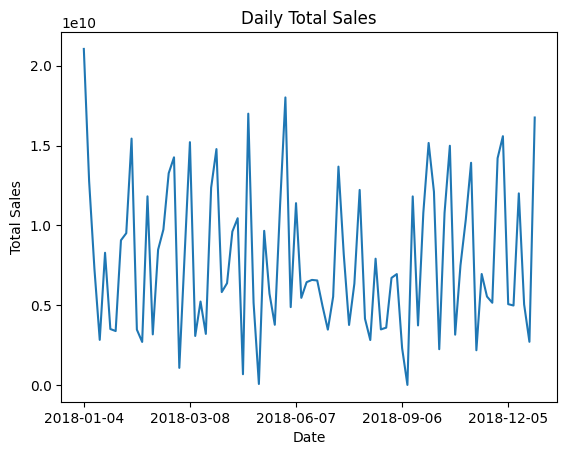

In [15]:
# ----------------- 2) المبيعات اليومية -----------------
daily_sales = df.groupby("date")["total_sales"].sum()
print("Highest sales:", daily_sales.idxmax(), daily_sales.max())
print("Lowest sales:", daily_sales.idxmin(), daily_sales.min())

plt.figure()
daily_sales.plot()
plt.title("Daily Total Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

film_code
1554    1604697
1484     690656
1482     632347
1493     631174
1483     563296
1576     487153
1481     432786
1485     356026
1556     237071
1494     197432
Name: tickets_sold, dtype: int64


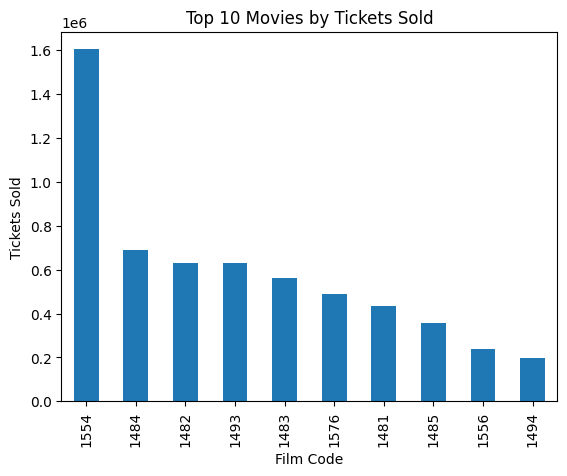

In [16]:
# ----------------- 3) أفضل 10 أفلام -----------------
top_movies = df.groupby("film_code")["tickets_sold"].sum().sort_values(ascending=False).head(10)
print(top_movies)

plt.figure()
top_movies.plot(kind="bar")
plt.title("Top 10 Movies by Tickets Sold")
plt.xlabel("Film Code")
plt.ylabel("Tickets Sold")
plt.show()


cinema_code
448    82901737937
304    37732311000
489    23527050000
524    23317154997
163    23213174000
344    21512070000
450    17172850000
352    16898930000
518    15542680000
71     14819250000
Name: total_sales, dtype: int64


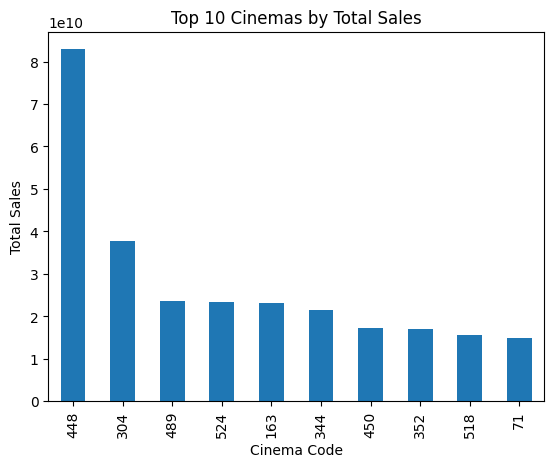

In [17]:

# ----------------- 4) أفضل 10 سينمات -----------------
top_cinemas = df.groupby("cinema_code")["total_sales"].sum().sort_values(ascending=False).head(10)
print(top_cinemas)

plt.figure()
top_cinemas.plot(kind="bar")
plt.title("Top 10 Cinemas by Total Sales")
plt.xlabel("Cinema Code")
plt.ylabel("Total Sales")
plt.show()

count    53794.000000
mean        20.497354
std         22.922835
min          0.000000
25%          3.900000
50%         10.880000
75%         29.240000
max        136.500000
Name: occu_perc, dtype: float64


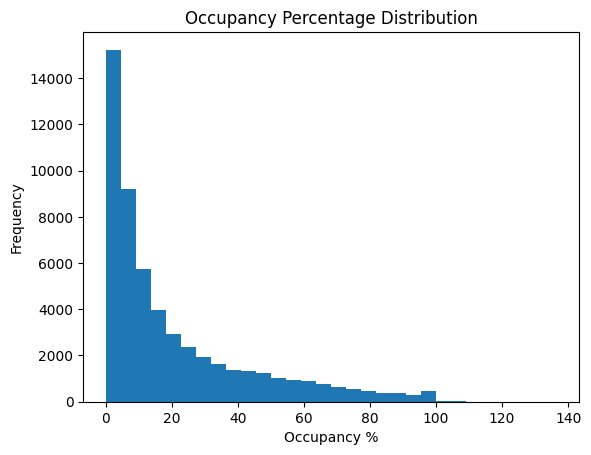

In [18]:
# ----------------- 5) نسبة الإشغال -----------------
print(df["occu_perc"].describe())

plt.figure()
df["occu_perc"].plot(kind="hist", bins=30)
plt.title("Occupancy Percentage Distribution")
plt.xlabel("Occupancy %")
plt.ylabel("Frequency")
plt.show()

is_weekend
False    1.303228e+07
True     1.135768e+07
Name: total_sales, dtype: float64


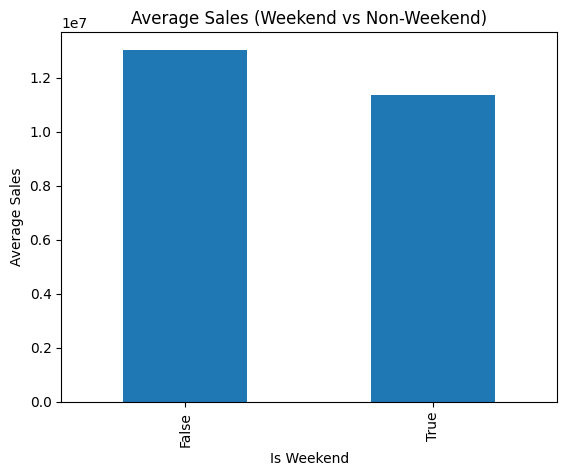

In [19]:
# ----------------- 6) تأثير الويكند -----------------
weekend_sales = df.groupby("is_weekend")["total_sales"].mean()
print(weekend_sales)

plt.figure()
weekend_sales.plot(kind="bar")
plt.title("Average Sales (Weekend vs Non-Weekend)")
plt.xlabel("Is Weekend")
plt.ylabel("Average Sales")
plt.show()


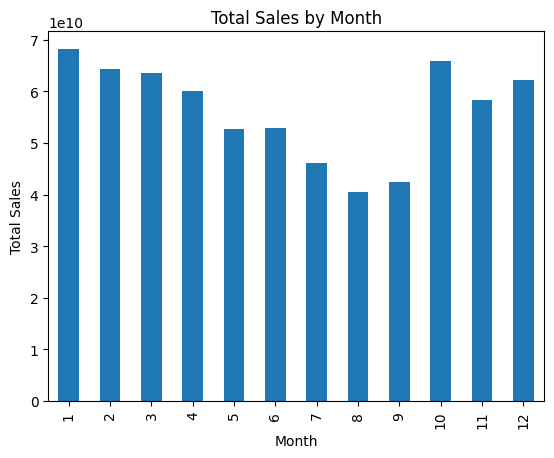

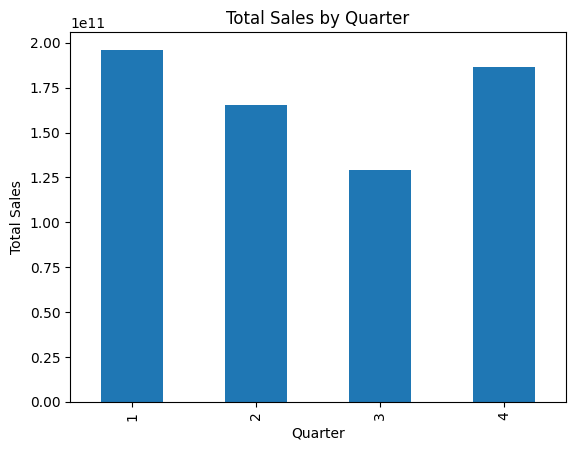

In [20]:
# ----------------- 8) المبيعات الشهرية والفصلية -----------------
# Extract month and quarter from the date column
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter

monthly_sales = df.groupby("month")["total_sales"].sum()
quarterly_sales = df.groupby("quarter")["total_sales"].sum()

plt.figure()
monthly_sales.plot(kind="bar")
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

plt.figure()
quarterly_sales.plot(kind="bar")
plt.title("Total Sales by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.show()

# Statsmodels

In [21]:
import statsmodels.api as sm
import numpy as np

# وصف بسيط للأعمدة
print(df[['total_sales','ticket_price','capacity']].describe())

# أو باستخدام numpy / statsmodels
print("Mean:", np.mean(df['total_sales']))
print("Median:", np.median(df['total_sales']))
print("Std:", np.std(df['total_sales']))

        total_sales   ticket_price      capacity
count  5.379400e+04   53794.000000  53794.000000
mean   1.258958e+07   80976.136473    843.247237
std    3.099299e+07   33521.413033    948.256141
min    2.500000e+04    1600.000000     -2.000000
25%    1.280000e+06   60000.000000    269.958948
50%    3.800000e+06   78787.878790    514.705882
75%    1.136000e+07  100000.000000   1020.408163
max    1.058980e+09  700000.000000   8461.538462
Mean: 12589584.21732907
Median: 3800000.0
Std: 30992699.897091035


In [22]:
from scipy import stats

weekend_sales = df[df['is_weekend']==1]['total_sales']
weekday_sales = df[df['is_weekend']==0]['total_sales']

t_stat, p_val = stats.ttest_ind(weekend_sales, weekday_sales, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: -5.804642698183246
P-value: 6.520785084214022e-09


In [24]:
# حددي y و X (اختاري الأعمدة اللي تحتاجينها)
y = df["total_sales"]
X = df[["capacity", "ticket_price", "show_time", "is_weekend", "month", "quarter", "day"]].copy()

# تحويل كل الأعمدة الرقمية (وأهمها is_weekend) إلى أرقام
X = X.apply(pd.to_numeric, errors="coerce")
y = pd.to_numeric(y, errors="coerce")

# حذف الصفوف اللي فيها NaN بالتجميع
combined = pd.concat([X, y.rename("total_sales")], axis=1).dropna()
X = combined[X.columns]
y = combined["total_sales"]

# إضافة الثابت
X = sm.add_constant(X)

# للتأكد من الأنماط قبل الملائمة
print("\n=== dtypes (X then y) ===")
print(X.dtypes)
print(y.dtype)

# ملائمة المودل
model_matrix = sm.OLS(y, X).fit()
print("\n=== OLS (matrix) summary ===")
print(model_matrix.summary())


=== dtypes (X then y) ===
const           float64
capacity        float64
ticket_price    float64
show_time         int64
is_weekend        int64
month             int32
quarter           int32
day               int64
dtype: object
int64

=== OLS (matrix) summary ===
                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     4070.
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:41:40   Log-Likelihood:            -9.9417e+05
No. Observations:               53794   AIC:                         1.988e+06
Df Residuals:                   53787   BIC:                         1.988e+06
Df Model:                           6                                         
Covariance Type:    

In [23]:
import statsmodels.formula.api as smf

# تأكد أن is_weekend أرقام (0/1)
df["is_weekend"] = df["is_weekend"].astype(int)

# المودل مع عوامل إضافية
model = smf.ols(
    "total_sales ~ is_weekend + tickets_sold + ticket_price + capacity + show_time + occu_perc",
    data=df
).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 6.151e+04
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:41:40   Log-Likelihood:            -9.4878e+05
No. Observations:               53794   AIC:                         1.898e+06
Df Residuals:                   53787   BIC:                         1.898e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.312e+07   1.47e+05    -89.326   

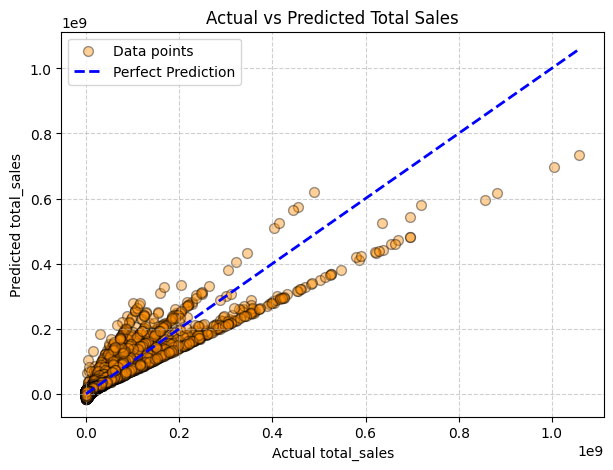

In [25]:
import matplotlib.pyplot as plt

# القيم الحقيقية والمتنبأ بها
actual = y
predicted = model.fittedvalues

plt.figure(figsize=(7,5))
plt.scatter(actual, predicted, alpha=0.4, c="darkorange", edgecolors="k", s=50, label="Data points")
plt.plot([actual.min(), actual.max()],
         [actual.min(), actual.max()],
         'b--', lw=2, label="Perfect Prediction")

plt.title("Actual vs Predicted Total Sales")
plt.xlabel("Actual total_sales")
plt.ylabel("Predicted total_sales")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


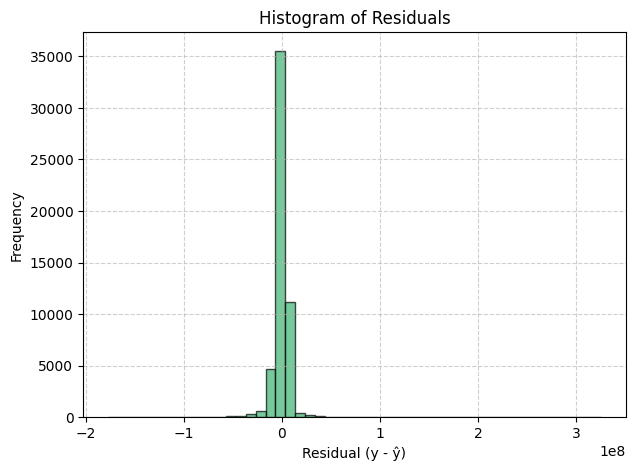

In [26]:
import matplotlib.pyplot as plt

# (Residuals)
residuals = model.resid

plt.figure(figsize=(7,5))
plt.hist(residuals, bins=50, color="mediumseagreen", alpha=0.7, edgecolor="black")
plt.title("Histogram of Residuals")
plt.xlabel("Residual (y - ŷ)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


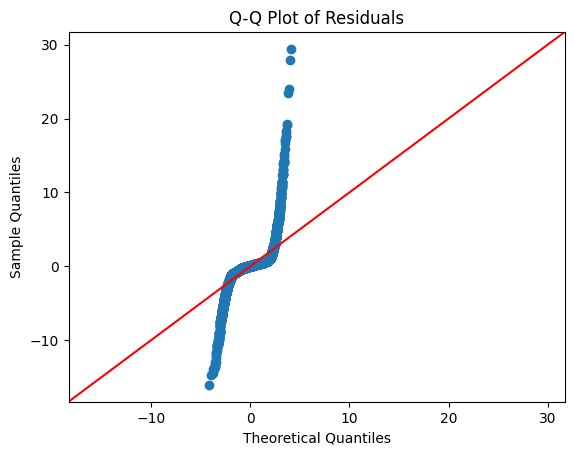

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = model.resid

fig = sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()


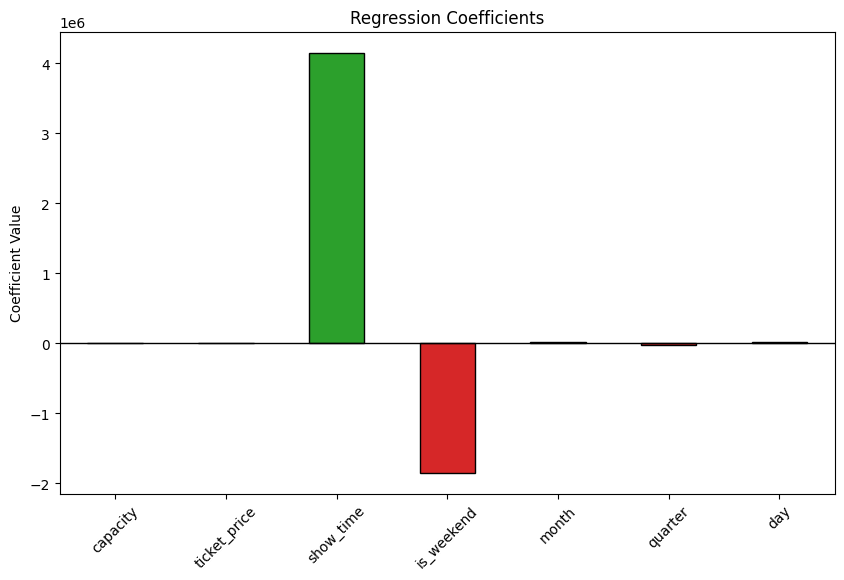

In [28]:
coef = model_matrix.params.drop("const")  # نستبعد الثابت

plt.figure(figsize=(10,6))
coef.plot(
    kind="bar",
    color=["#2ca02c" if c > 0 else "#d62728" for c in coef],  # أخضر موجب، أحمر سالب
    edgecolor="black"
)
plt.axhline(0, color="black", linewidth=1)
plt.title("Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()


# Modeling

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [30]:

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

In [31]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

In [32]:
df['lag_1'] = df['total_sales'].shift(1)
df['lag_7'] = df['total_sales'].shift(7)


df = df.dropna().reset_index(drop=True)

In [33]:
features = ['month','day','day_of_week','is_weekend','lag_1','lag_7']
X = df[features]
y = df['total_sales']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # shuffle=False is important for time-series data
)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
!pip install -U scikit-learn

In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 28508574.48


In [38]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² = {r2:.3f}")

R² = 0.313


In [39]:
joblib.dump({'model': model, 'features': features}, "simple_sales_model.pkl")
print("Saved model as simple_sales_model.pkl")

Saved model as simple_sales_model.pkl


In [40]:
from google.colab import files
files.download('simple_sales_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:

new_date = pd.to_datetime("2025-09-21")
lag_1 = df['total_sales'].iloc[-1]  #Previous day's sales
lag_7 = df['total_sales'].iloc[-7]  #Sales from one week ago

X_new = pd.DataFrame([{
    'month': new_date.month,
    'day': new_date.day,
    'day_of_week': new_date.dayofweek,
    'is_weekend': int(new_date.dayofweek in [5,6]),
    'lag_1': lag_1,
    'lag_7': lag_7
}])

y_new_pred = model.predict(X_new)[0]
print(f"Predicted Sales for {new_date.date()}: {int(y_new_pred)}")

Predicted Sales for 2025-09-21: 32266704


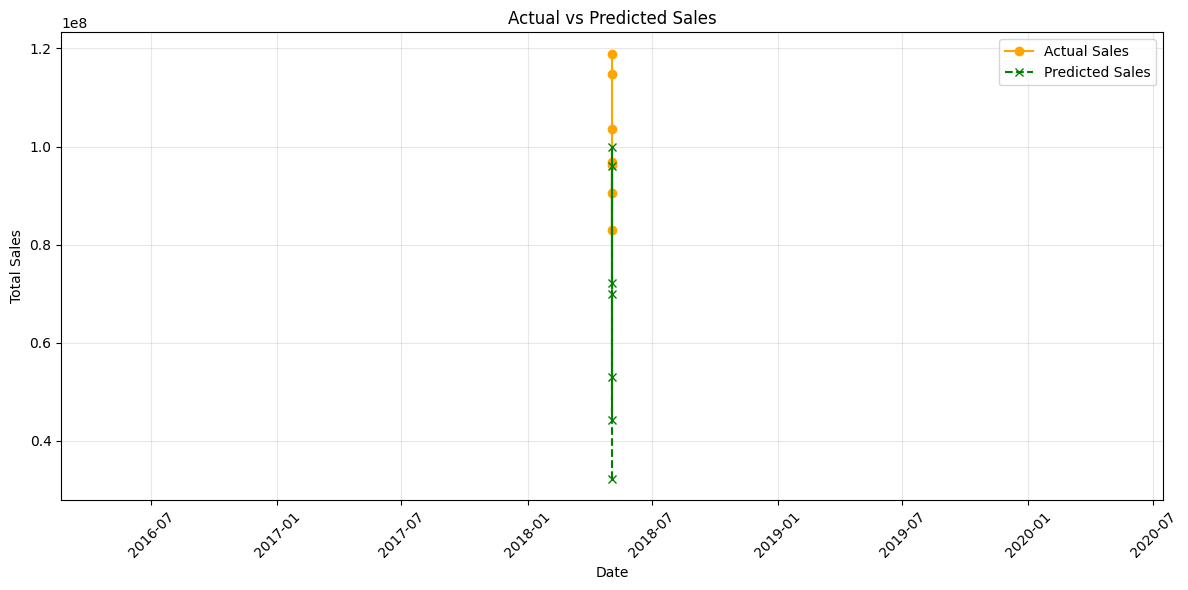

In [42]:
import matplotlib.pyplot as plt
#Select a specific period for plotting
start_date = '2018-05-04'
end_date = '2018-05-10'
df_plot = df[(df['date'] >= start_date) & (df['date'] <= end_date)]


y_pred_array = np.array([32266704, 70000000, 44327996, 96000000, 72261316, 99980000, 52990000])
df_plot = df_plot.iloc[:len(y_pred_array)]

plt.figure(figsize=(12,6))
plt.plot(df_plot['date'], df_plot['total_sales'], label='Actual Sales', color='orange', marker='o')
plt.plot(df_plot['date'], y_pred_array, label='Predicted Sales', color='green', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Actual vs Predicted Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
import numpy as np


y_true = np.array([3360000, 600000, 16500000, 3900000, 5000000, 7000000, 0])
y_pred = np.array([3400000, 700000, 16000000, 4000000, 5100000, 6900000, 22261316])


accuracy = 100 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"Accuracy-like metric: {accuracy:.2f}%")

Accuracy-like metric: -inf%


/tmp/ipython-input-2027514217.py:8: RuntimeWarning: divide by zero encountered in divide
  accuracy = 100 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [44]:
import numpy as np

y_true = np.array([3360000, 600000, 16500000, 3900000, 5000000, 7000000, 0])
y_pred = np.array([3400000, 700000, 16000000, 4000000, 5100000, 6900000, 22261316])

#Filter out values that are not zero
mask = y_true != 0
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

accuracy = 100 - np.mean(np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)) * 100
print(f"Accuracy-like metric: {accuracy:.2f}%")

Accuracy-like metric: 95.52%
